In [1]:
#Import the libraries that will be needed in the program.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aTlCyZRbJNCY4qazYOUGZRu3TtwwY-a-OERmvl8USkui',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'crudeoil-donotdelete-pr-6gegwhwphc398u'
object_key = 'Crude Oil Prices Daily.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

data = pd.read_excel(body.read())
data.head()


,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [3]:
#Check whether any null values are there or not if it is present then the following can be done,
#Imputing data using the Imputation method in sklearn.
#Filling NaN values with mean, median, and mode using fillna() method.
#Delete the records
data.tail(10)
data.isnull().any()
data.isnull().sum()
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

Text(0.5, 1.0, 'Variation of oil price over years')

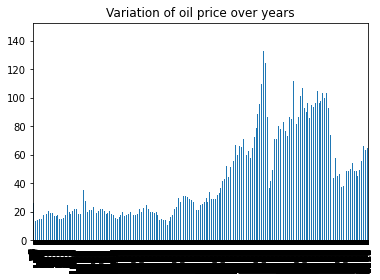

In [4]:
data['Closing Value'].plot(kind='bar')
plt.title('Variation of oil price over years')

In [5]:
data_oil=data["Closing Value"].reset_index()

In [6]:
data_oil

,index,Closing Value
0,0,25.56
1,1,26.00
2,2,26.53
3,3,25.85
4,4,25.87
...,...,...
8211,8217,73.89
8212,8218,74.19
8213,8220,73.05
8214,8221,73.78


In [7]:
#Feature scaling is a method used to normalize the range of independent variables or features of data.
# The next step is to scale the crude oil prices between (0, 1) to avoid intensive computation. 
# Common methods include Standardization and Normalization.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [8]:
data_oil

array([[0.00000000e+00],
       [3.10873267e-03],
       [1.21624909e-04],
       ...,
       [8.97348577e-03],
       [1.00000000e+00],
       [8.99172951e-03]])

<Figure size 1.08e+09x360 with 0 Axes>

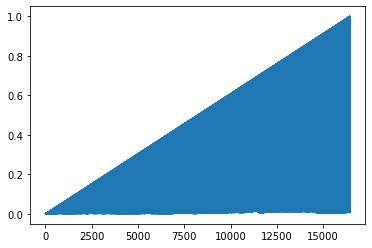

<Figure size 1.08e+09x360 with 0 Axes>

In [9]:
#Data visualization is where a given data set is presented in a graphical format.
# It helps the detection of patterns, trends, and correlations that might go undetected in text-based data.
# Visualize our data using the Matplotlib and seaborn library.
plt.plot(data_oil)
plt.figure(figsize=(15000000,5))

In [10]:
plt.rcParams("figure.figsize")=(20,6)


SyntaxError: cannot assign to function call (3405671071.py, line 1)

In [11]:
#When you are working on a model and you want to train it, you have a dataset.
# But after training, we have to test the model on some test dataset.
# For this, you will need a dataset that is different from the training set you used earlier. 
# But it might not always be possible to have so much data during the development phase.
# In such cases, the solution is to split the dataset into two sets, one for training and the other for testing.
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:,:1]
train_data.shape,test_data.shape
#The size of the train and test data after splitting.
training_size,test_size

(10680, 5752)

In [12]:
# convert an array of values into a dataset matrix
def create_dataset (dataset,time_step=1):
    datax,datay =[],[]
    for i in range(len(dataset)-time_step-1) :
        a=dataset[i:(i+time_step), 0]
        datax.append(a)
        datay.append (dataset[i + time_step, 0])
    return np.array(datax),np.array(datay)


In [13]:
# reshape into Xat, t+1, t+2, t+3 and Y=t+4
time_step = 10
x_train,y_train = create_dataset(train_data, time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [14]:
#Shape of training data.
print(x_train.shape),print(y_train.shape)

(10669, 10)
(10669,)


(None, None)

In [15]:
#Shape of test data.
print (x_test.shape), print (y_test.shape)

(5741, 10)
(5741,)


(None, None)

In [16]:
#The data of X_train.
x_train

array([[0.00000000e+00, 3.10873267e-03, 1.21624909e-04, ...,
        3.14400389e-03, 4.86499635e-04, 3.14643639e-03],
       [3.10873267e-03, 1.21624909e-04, 3.16224763e-03, ...,
        4.86499635e-04, 3.14643639e-03, 6.08124544e-04],
       [1.21624909e-04, 3.16224763e-03, 2.43249818e-04, ...,
        3.14643639e-03, 6.08124544e-04, 3.16589638e-03],
       ...,
       [6.48625639e-01, 7.22451958e-03, 6.48747263e-01, ...,
        7.46898565e-03, 6.49112138e-01, 7.47506689e-03],
       [7.22451958e-03, 6.48747263e-01, 7.33154950e-03, ...,
        6.49112138e-01, 7.47506689e-03, 6.49233763e-01],
       [6.48747263e-01, 7.33154950e-03, 6.48868888e-01, ...,
        7.47506689e-03, 6.49233763e-01, 7.51398686e-03]])

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM.
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [38]:
!pip install ibm_watson_machine_learning

In [41]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey": "FuOVK4NIKK7mntk0VwDBd3gD0p_Rg9Y5P3gIKXFhviha"
}
client = APIClient(wml_credentials)

In [48]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print (space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata'] ['id'])

In [50]:
space_uid=guid_from_space_name(client,'models')
print("Space uid=" + space_uid)

Space uid=021fcb15-65cc-43fc-87ee-1b4f98d0c284


In [51]:
client.set.default_space(space_uid)

'SUCCESS'

In [58]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [104]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [110]:
model_details = client.repository.store_model(model = "body.tgz" , meta_props = {
    client.repository.ModelMetaNames.NAME : "Crude_oil", 
    client.repository.ModelMetaNames.TYPE : "tensorflow_rt22.1",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})
model_id = client.repository.get_model_id(model_details)

In [111]:
model_id

'2abbbf09-648e-484a-b4a2-4ce6528cd887'

In [62]:
#Create the stacked LSTM model.
#Import the model building libraries.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM

In [63]:
#Initializing the libraries.
models=Sequential()

In [64]:
#Adding LSTM layers.
models.add(LSTM(50, return_sequences=True, input_shape=(10,1))) 
models.add(LSTM(50, return_sequences=True))
models.add(LSTM(50))

In [65]:
#Adding output layers.
models.add(Dense(1))

In [66]:
#Information about the model and it's layers.
models.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [67]:
#Configuring the learning process.
#Metrics are used to evaluate the performance of your model.
models.compile(loss="mean_squared_error",optimizer="adam")

In [68]:
#Train the model.
# RNN weights are updated every 64 stock prices with a batch size of 64.
models.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
167/167 [==============================] - 8s 22ms/step - loss: 0.0169 - val_loss: 0.0329
Epoch 2/50
167/167 [==============================] - 3s 16ms/step - loss: 3.4466e-04 - val_loss: 0.0121
Epoch 3/50
167/167 [==============================] - 2s 14ms/step - loss: 1.8586e-04 - val_loss: 0.0071
Epoch 4/50
167/167 [==============================] - 3s 16ms/step - loss: 1.4301e-04 - val_loss: 0.0074
Epoch 5/50
167/167 [==============================] - 3s 16ms/step - loss: 1.7251e-04 - val_loss: 0.0048
Epoch 6/50
167/167 [==============================] - 2s 14ms/step - loss: 6.0298e-05 - val_loss: 0.0055
Epoch 7/50
167/167 [==============================] - 2s 14ms/step - loss: 2.0449e-04 - val_loss: 0.0056
Epoch 8/50
167/167 [==============================] - 3s 16ms/step - loss: 7.6681e-05 - val_loss: 0.0041
Epoch 9/50
167/167 [==============================] - 3s 15ms/step - loss: 7.3377e-05 - val_loss: 0.0038
Epoch 10/50
167/167 [==============================] - 3s 1

In [80]:
#Tranform to original from.
train_predict= models.predict(x_train)
train_predict=scaler.inverse_transform(train_predict)
test_predict= models.predict(x_test)
test_predict=scaler.inverse_transform(test_predict)

In [81]:
#Calculate RMSeperformance metrics.
import math
from sklearn.metrics import mean_squared_error
math.sqrt (mean_squared_error(y_train, train_predict))

2182.095901075961

In [82]:
#Save the model.
from tensorflow.keras.models import load_model
models.save("crude_oil.h5")

In [107]:
!tar -zcvf body.tgz crude_oil.h5


crude_oil.h5


In [109]:
ls -1

body.tgz
crude_oil.h5


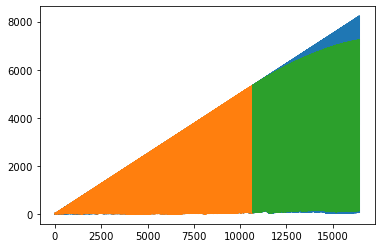

In [83]:
##Plotting
#Shift train predictions for plotting.
look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1,:] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [84]:
#Print length of data.
len(test_data)

5752

In [85]:
#Create the input and reshape it and convert it into list
x_input=test_data[5742: ].reshape (1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [86]:
temp_input

[0.9993918754560934,
 0.008986864509851618,
 0.9995135003648747,
 0.009023351982486013,
 0.9997567501824374,
 0.00888469958647531,
 0.9998783750912187,
 0.008973485769885672,
 1.0,
 0.008991729506202872]

In [87]:
#For predicting next 10 days crude oil prices we consider n_steps=10.
#We create the input for prediction, index starting from the date 10 days before the first date in the test dataset.
# Then, reshape the inputs to have only 1 column and predict using model_predict predefined function.
lst_output=[] 
n_steps=10
i=0 
while(i<10):
    if(len(temp_input)>10):
        print (temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format (i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format (i,yhat))
        temp_input.extend (yhat [0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1 
    else:
        x_input = x_input.reshape( (1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print (yhat [0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend (yhat.tolist())
        i=i+1

[0.9033178]
11
[0.9993918754560934, 0.008986864509851618, 0.9995135003648747, 0.009023351982486013, 0.9997567501824374, 0.00888469958647531, 0.9998783750912187, 0.008973485769885672, 1.0, 0.008991729506202872, 0.9033178091049194]
1 day input [0.00898686 0.9995135  0.00902335 0.99975675 0.0088847  0.99987838
 0.00897349 1.         0.00899173 0.90331781]
[[[0.00898686]
  [0.9995135 ]
  [0.00902335]
  [0.99975675]
  [0.0088847 ]
  [0.99987838]
  [0.00897349]
  [1.        ]
  [0.00899173]
  [0.90331781]]]
1 day output [[0.03204256]]
[0.008986864509851618, 0.9995135003648747, 0.009023351982486013, 0.9997567501824374, 0.00888469958647531, 0.9998783750912187, 0.008973485769885672, 1.0, 0.008991729506202872, 0.9033178091049194, 0.03204256296157837]
[0.008986864509851618, 0.9995135003648747, 0.009023351982486013, 0.9997567501824374, 0.00888469958647531, 0.9998783750912187, 0.008973485769885672, 1.0, 0.008991729506202872, 0.9033178091049194, 0.03204256296157837]
2 day input [0.9995135  0.0090233

array([[7427.07902646],
       [ 263.45395267],
       [7486.82191551],
       [ 428.49642805],
       [7633.51487589],
       [ 630.2751787 ],
       [7751.71030128],
       [ 514.42559296],
       [7541.25931334],
       [-313.42776788]])

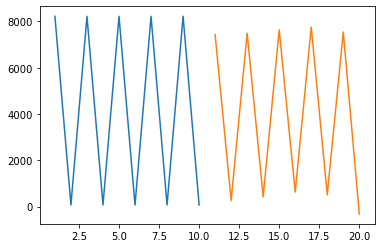

In [88]:
#Create a visualization plot to easily review the prediction.
day_new=np.arange(1,11)
day_pred=np.arange (11,21)
len(data_oil)
plt.plot(day_new, scaler.inverse_transform(data_oil[16422:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))
k=scaler.inverse_transform(lst_output)
k

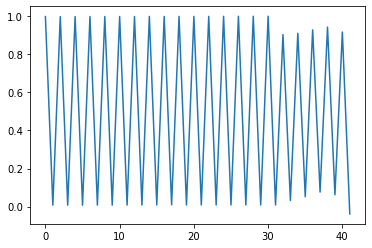

In [89]:
#Merge the the past data and next 10 days output prediction.
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[16400:])

In [90]:
#Reversing the predictions.
df3=scaler.inverse_transform(df3).tolist()
